# Simple Charts: Core Concepts

The goal of this section is to teach you the core concepts required to create a basic Altair chart; namely:

- **Data**, **Marks**, and **Encodings**: the three core pieces of an Altair chart

- **Encoding Types**: ``Q`` (quantitative), ``N`` (nominal), ``O`` (ordinal), ``T`` (temporal), which drive the visual representation of the encodings

- **Binning and Aggregation**: which let you control aspects of the data representation within Altair.

With a good understanding of these core pieces, you will be well on your way to making a variety of charts in Altair.

We'll start by importing Altair, and (if necessary) enabling the appropriate renderer:

In [1]:
import altair as alt

# Altair plots render by default in JupyterLab and nteract

# Uncomment/run this line to enable Altair in the classic notebook (not in JupyterLab)
# alt.renderers.enable('notebook')

# Uncomment/run this line to enable Altair in Colab
# alt.renderers.enable('colab')

## A Basic Altair Chart

The essential elements of an Altair chart are the **data**, the **mark**, and the **encoding**.

The format by which these are specified will look something like this:

```python
alt.Chart(data).mark_point().encode(
    encoding_1='column_1',
    encoding_2='column_2',
    # etc.
)
```

Let's take a look at these pieces, one at a time.

### The Data

Data in Altair is built around the [Pandas Dataframe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).
For this section, we'll use the cars dataset that we saw before, which we can load using the [vega_datasets](https://github.com/altair-viz/vega_datasets) package:

In [2]:
from vega_datasets import data
cars = data.cars()

cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


Data in Altair is expected to be in a [tidy format](http://vita.had.co.nz/papers/tidy-data.html); in other words:

- each **row** is an observation
- each **column** is a variable

See  [Altair's Data Documentation](https://altair-viz.github.io/user_guide/data.html) for more information.

### The *Chart* object

With the data defined, you can instantiate Altair's fundamental object, the ``Chart``:

In [3]:
chart = alt.Chart(cars)

Fundamentally, a ``Chart`` is an object which knows how to emit a JSON dictionary representing the data and visualization encodings, which can be sent to the notebook and rendered by the Vega-Lite JavaScript library.
Let's take a look at what this JSON representation looks like, using only the first row of the data:

In [4]:
cars1 = cars.iloc[:1]
alt.Chart(cars1).to_dict()

{'config': {'view': {'width': 400, 'height': 300}},
 'data': {'values': [{'Acceleration': 12.0,
    'Cylinders': 8,
    'Displacement': 307.0,
    'Horsepower': 130.0,
    'Miles_per_Gallon': 18.0,
    'Name': 'chevrolet chevelle malibu',
    'Origin': 'USA',
    'Weight_in_lbs': 3504,
    'Year': '1970-01-01'}]},
 '$schema': 'https://vega.github.io/schema/vega-lite/v2.4.1.json'}

At this point the chart only includes a JSON-formatted representation of the dataframe, along with some metadata that is included in every chart output.

### The Mark

Next we can decide what sort of *mark* we would like to use to represent our data.
For example, we can choose the ``point`` mark to represent each data as a point on the plot:

In [5]:
alt.Chart(cars).mark_point()

The result is a visualization with one point per row in the data, though it is not a particularly interesting: all the points are stacked right on top of each other!

It is useful to again examine the JSON output here:

In [6]:
alt.Chart(cars1).mark_point().to_dict()

{'config': {'view': {'width': 400, 'height': 300}},
 'data': {'values': [{'Acceleration': 12.0,
    'Cylinders': 8,
    'Displacement': 307.0,
    'Horsepower': 130.0,
    'Miles_per_Gallon': 18.0,
    'Name': 'chevrolet chevelle malibu',
    'Origin': 'USA',
    'Weight_in_lbs': 3504,
    'Year': '1970-01-01'}]},
 'mark': 'point',
 '$schema': 'https://vega.github.io/schema/vega-lite/v2.4.1.json'}

Notice that now in addition to the data, the specification includes information about the mark type.

There are a number of available marks that you can use; some of the more common are the following:

* ``mark_point()`` 
* ``mark_circle()``
* ``mark_square()``
* ``mark_line()``
* ``mark_area()``
* ``mark_bar()``
* ``mark_tick()``

You can get a complete list of ``mark_*`` methods using Jupyter's tab-completion feature: in any cell just type:

    alt.Chart.mark_
    
followed by the tab key to see the available options.

In [7]:
# try the tab completion here


### Encodings

The next step is to add *visual encoding channels* (or *encodings* for short) to the chart. An encoding channel specifies how a given data column should be mapped onto the visual properties of the visualization.
Some of the more frequenty used visual encodings are listed here:

* ``x``: x-axis value
* ``y``: y-axis value
* ``color``: color of the mark
* ``opacity``: transparency/opacity of the mark
* ``shape``: shape of the mark
* ``size``: size of the mark
* ``row``: row within a grid of facet plots
* ``column``: column within a grid of facet plots

For a complete list of these encodings, see the [Encodings](https://altair-viz.github.io/user_guide/encoding.html) section of the documentation.

Visual encodings can be created with the `encode()` method of the `Chart` object. For example, we can start by mapping the `y` axis of the chart to the `Origin` column:

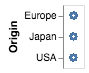

In [8]:
alt.Chart(cars).mark_point().encode(
    y='Origin'
)

The result is a one-dimensional visualization representing the values taken on by `species`, with the points in each category on top of each other.
As above, we can view the JSON data generated for this visualization:

In [9]:
alt.Chart(cars1).mark_point().encode(
    x='Origin'
).to_dict()

{'config': {'view': {'width': 400, 'height': 300}},
 'data': {'values': [{'Acceleration': 12.0,
    'Cylinders': 8,
    'Displacement': 307.0,
    'Horsepower': 130.0,
    'Miles_per_Gallon': 18.0,
    'Name': 'chevrolet chevelle malibu',
    'Origin': 'USA',
    'Weight_in_lbs': 3504,
    'Year': '1970-01-01'}]},
 'mark': 'point',
 'encoding': {'x': {'type': 'nominal', 'field': 'Origin'}},
 '$schema': 'https://vega.github.io/schema/vega-lite/v2.4.1.json'}

The result is the same as above with the addition of the `'encoding'` key, which specifies the visualization channel (`x`), the name of the field (`a`), and the type of the variable (`nominal`).
We'll discuss these data types in a moment.

The visualization can be made more interesting by adding another channel to the encoding: let's encode the `petalLength` as the `x` position:

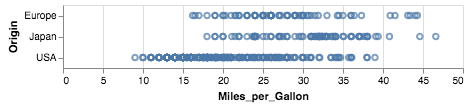

In [10]:
alt.Chart(cars).mark_point().encode(
    y='Origin',
    x='Miles_per_Gallon'
)

You can add as many encodings as you wish, with each encoding mapped to a column in the data.
For example, here we will color the points by *Origin*, and plot *Miles_per_gallon* vs *Year*:

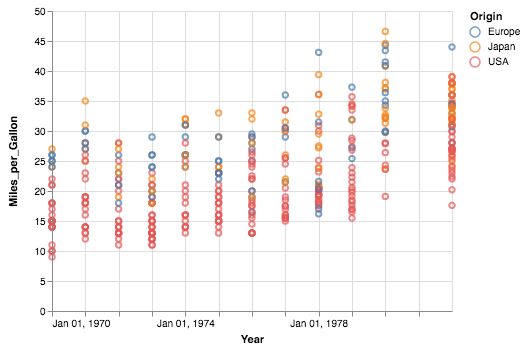

In [11]:
alt.Chart(cars).mark_point().encode(
    color='Origin',
    y='Miles_per_Gallon',
    x='Year'
)

### Excercise: Exploring Data

Now that you know the basics (Data, encodings, marks) take some time and try making a few plots!

In particular, I'd suggest trying various combinations of the following:

- Marks: ``mark_point()``, ``mark_line()``, ``mark_bar()``, ``mark_text()``, ``mark_rect()``...
- Data Columns: ```'Acceleration'``, ``'Cylinders'``, ``'Displacement'``, ``'Horsepower'``, ``'Miles_per_Gallon'``, ``'Name'``, ``'Origin'``, ``'Weight_in_lbs'``, ``'Year'``
- Encodings: ``x``, ``y``, ``color``, ``shape``, ``row``, ``column``, ``opacity``, ``text``, ``tooltip``...

Work with a partner to use various combinations of these options, and see what you can learn from the data! In particular, think about the following:

- Which encodings go well with continuous, quantitative values?
- Which encodings go well with discrete, categorical (i.e. nominal) values?

After about 10 minutes, we'll ask for a couple volunteers to share their combination of marks, columns, and encodings.

---

## Encoding Types

One of the central ideas of Altair is that the library will **choose good defaults for your data type**.

The basic data types supported by Altair are as follows:

<table>
  <tr>
    <th>Data Type</th>
    <th>Code</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>quantitative</td>
    <td>Q</td>
    <td>Numerical quantity (real-valued)</td>
  </tr>
  <tr>
    <td>nominal</td>
    <td>N</td>
    <td>Name / Unordered categorical</td>
  </tr>
  <tr>
    <td>ordinal</td>
    <td>O</td>
    <td>Ordered categorial</td>
  </tr>
  <tr>
    <td>temporal</td>
    <td>T</td>
    <td>Date/time</td>
  </tr>
</table>

When you specify data as a pandas dataframe, these types are **automatically determined** by Altair.

When you specify data as a URL, you must **manually specify** data types for each of your columns.

Let's look at a simple plot containing three of the columns from the cars data:

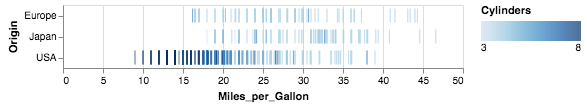

In [12]:
alt.Chart(cars).mark_tick().encode(
    x='Miles_per_Gallon',
    y='Origin',
    color='Cylinders'
)

Questions:

- what data type best goes with ``Miles_per_Gallon``?
- what data type best goes with ``Origin``?
- what data type best goes with ``Cylinders``?

Let's add the shorthands for each of these data types to our specification, using the one-letter codes above
(for example, change ``"Miles_per_Gallon"`` to ``"Miles_per_Gallon:Q"`` to explicitly specify that it is a quantitative type):

As you use Altair, it is useful to get into the habit of always specifying these types explicitly, because this is *mandatory* when working with data loaded from a file or a URL.

### Exercise: Adding Explicit Types

Following are a few simple charts made with the cars dataset. For each one, try to add explicit types to the encodings (i.e. change ``"Horsepower"`` to ``"Horsepower:Q"`` so that the plot doesn't change.

Are there any plots that can be made better by changing the type?

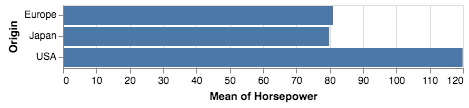

In [13]:
alt.Chart(cars).mark_bar().encode(
    y='Origin',
    x='mean(Horsepower)'
)

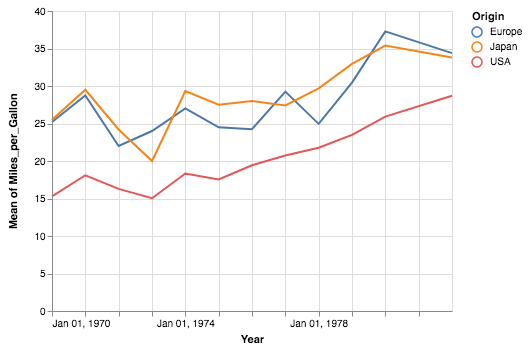

In [14]:
alt.Chart(cars).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)',
    color='Origin'
)

In [ ]:
alt.Chart(cars).mark_bar().encode(
    y='Cylinders',
    x='count()',
    color='Origin'
)

In [ ]:
alt.Chart(cars).mark_rect().encode(
    x='Cylinders',
    y='Origin',
    color='count()'
)